<a href="https://colab.research.google.com/github/zalu224/booking-app/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About dataset:


1.   id: unique id for a news article
2.   title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake


1: Fake news

0: Real news


Importing the Dependencies


In [ ]:
import numpy as np #npy arrays
import pandas as pd #creation of data frames and storing data frame
import re #regular expression, useful for searching text in documents
from nltk.corpus import stopwords #corpus - important body of text
#nltk - natural language toolkit, stopwords excludes useless words of a text
from nltk.stem.porter import PorterStemmer
#stemming takes words and removes prefix and suffix of word to get root

from sklearn.feature_extraction.text import TfidfVectorizer
#convert text into feature vectors for numbers

from sklearn.model_selection import train_test_split
#split our data set into training and test data

from sklearn.linear_model import LogisticRegression
#logistic regression

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt



In [ ]:
import nltk
nltk.download('stopwords') # downloads stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english')) #printing english removed words from dataset

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Pre-processing

In [ ]:
# loading the dataset to a pandas DataFrame
file = '/content/train.csv' #changeable file
news_dataset = pd.read_csv(file)

In [ ]:
news_dataset.shape

(20800, 5)

In [ ]:
#print the first 5 rows of dataframe
news_dataset.head()


,id,title,author,text,label,word_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820.0
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,727.0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266.0
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,559.0
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154.0


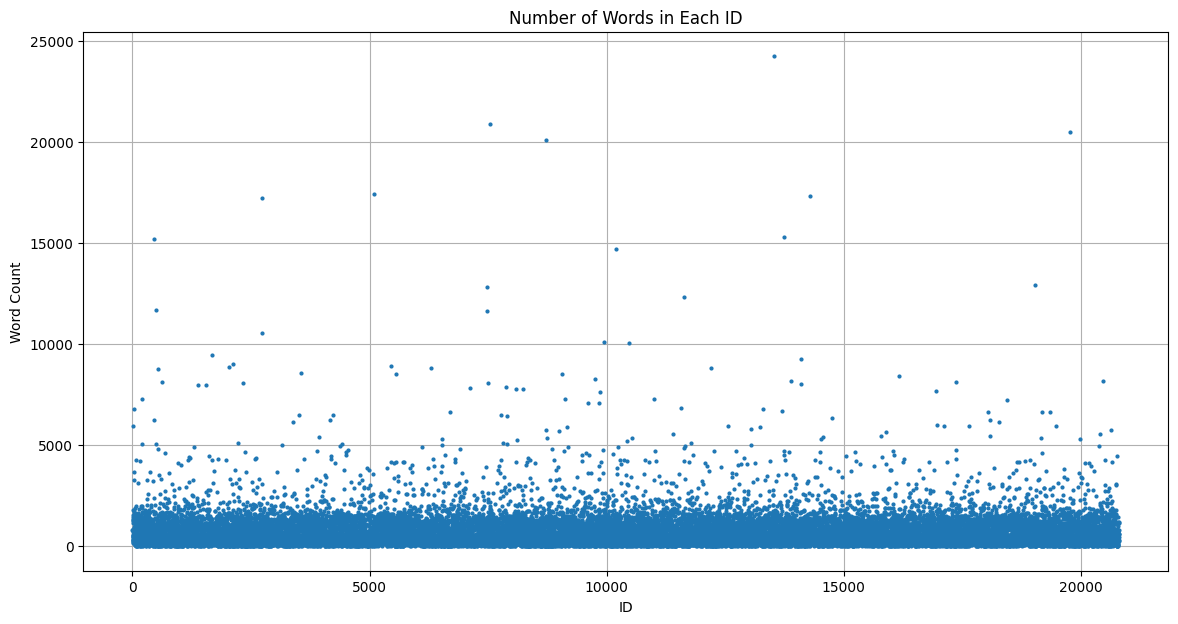

In [ ]:
news_dataset['word_count'] = news_dataset['text'].str.count(' ') + 1

# Plotting the 'id' vs 'word_count'
plt.figure(figsize=(14, 7))
plt.plot(news_dataset['id'], news_dataset['word_count'], marker='o', linestyle='', ms=2)
plt.title('Number of Words in Each ID')
plt.xlabel('ID')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

In [ ]:
#counting the number of missing values in the dataset
news_dataset.isnull().sum()
#in this case from the ~20000 values, there are the missing values below

id               0
title          558
author        1957
text            39
label            0
word_count      39
dtype: int64

In [ ]:
# replacing null values with empty string
news_dataset = news_dataset.fillna('') # '' can also be considered a null string

Unique authors/news = 4202
Number of fake news =  10413
Number of real news =  10387


<BarContainer object of 2 artists>

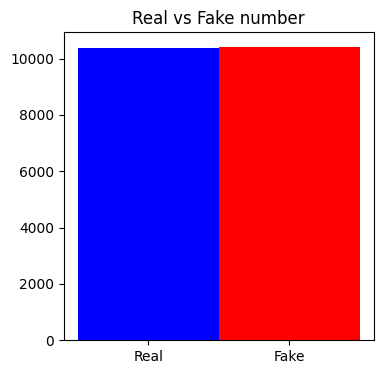

In [ ]:
import operator as op

#merging author name and news title for analyzing
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

print("Unique authors/news =",news_dataset['author'].nunique())

realcount = op.countOf(news_dataset['label'], 0)
fakecount = op.countOf(news_dataset['label'], 1)
print("Number of fake news = ",fakecount)

print("Number of real news = ",realcount)
rflist = [realcount,fakecount]
plt.figure(figsize = (4,4))
abc = ['Real','Fake']
plt.title("Real vs Fake number")
plt.bar(abc,rflist,width = 1,color = ['blue', 'red'])

<Axes: title={'center': 'Authors with most publications'}, ylabel='author'>

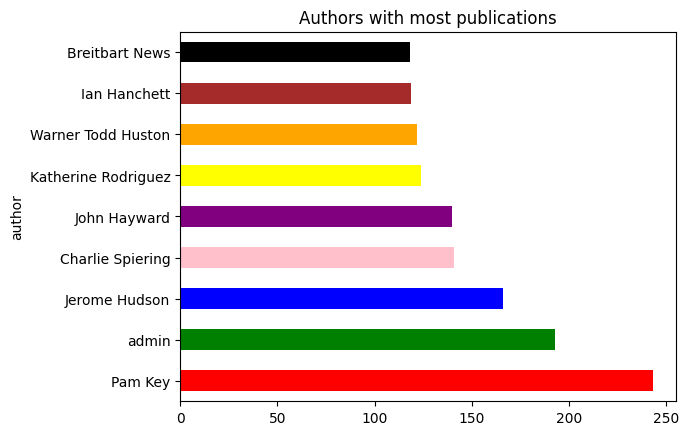

In [ ]:
plt.title("Authors with most publications")
news_dataset['author'].value_counts()[1:10].plot(kind='barh',color = ['red', 'green','blue','pink','purple','yellow','orange','brown','black'])

<BarContainer object of 9 artists>

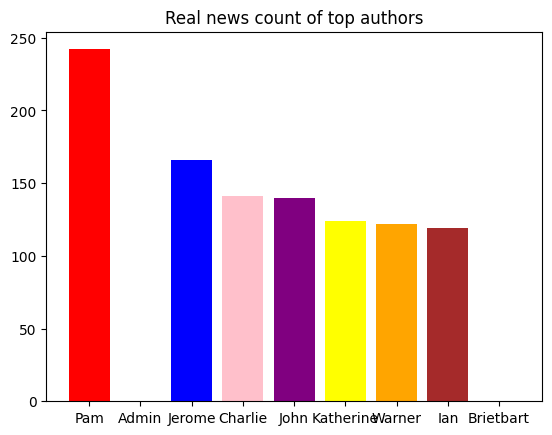

In [ ]:
Pam = news_dataset[news_dataset['author'] == 'Pam Key']
fakep = op.countOf(Pam['label'], 1)
realp = op.countOf(Pam['label'], 0)

admin = news_dataset[news_dataset['author'] == 'admin']
fakea = op.countOf(admin['label'], 1)
reala = op.countOf(admin['label'], 0)

jerome = news_dataset[news_dataset['author'] == 'Jerome Hudson']
fakej = op.countOf(jerome['label'], 1)
realj = op.countOf(jerome['label'], 0)

charlie = news_dataset[news_dataset['author'] == 'Charlie Spiering']
fakec = op.countOf(charlie['label'], 1)
realc = op.countOf(charlie['label'], 0)

john = news_dataset[news_dataset['author'] == 'John Hayward']
fakejo = op.countOf(john['label'], 1)
realjo = op.countOf(john['label'], 0)

kat = news_dataset[news_dataset['author'] == 'Katherine Rodriguez']
fakekat = op.countOf(kat['label'], 1)
realkat = op.countOf(kat['label'], 0)

warner = news_dataset[news_dataset['author'] == 'Warner Todd Huston']
fakew = op.countOf(warner['label'], 1)
realw = op.countOf(warner['label'], 0)

ian = news_dataset[news_dataset['author'] == 'Ian Hanchett']
fakeian = op.countOf(ian['label'], 1)
realian = op.countOf(ian['label'], 0)

briet = news_dataset[news_dataset['author'] == 'Brietbart News']
fakebriet = op.countOf(briet['label'], 1)
realbriet = op.countOf(briet['label'], 0)


listr = [realp,reala,realj,realc,realjo,realkat,realw,realian,realbriet]
listx = ['Pam','Admin','Jerome','Charlie',"John","Katherine","Warner","Ian","Brietbart"]
listw = [fakep,fakea,fakej,fakec,fakejo,fakekat,fakew,fakeian,fakebriet]

plt.title("Real news count of top authors")
plt.bar(listx,listr,color = ['red', 'green','blue','pink','purple','yellow','orange','brown','black'])


<BarContainer object of 9 artists>

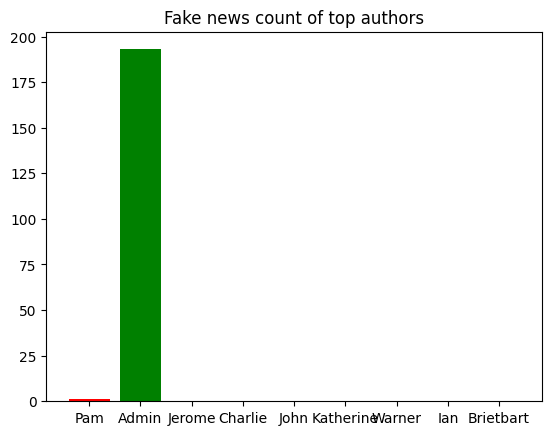

In [ ]:
plt.title("Fake news count of top authors")
plt.bar(listx,listw,color = ['red', 'green','blue','pink','purple','yellow','orange','brown','black'])

In [ ]:
print(news_dataset['content']) #using content to make predictions

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data & label
X = news_dataset.drop(columns = 'label', axis = 1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Steming:
Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [ ]:
port_stem = PorterStemmer()

In [ ]:
# stemming content to m
def stemming(content):
  if not isinstance(content, str):
        return ''  # or however you wish to handle non-string input
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  #calling reg exp to search for text in paragraph, attaining all these alphabets, excluding not alphabets
  stemmed_content = stemmed_content.lower() # convert alphabets to lowercase letters
  stemmed_content = stemmed_content.split() # converted words into a list
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  # taking each word and stemming it, parse through and remove stopwords
  stemmed_content = ' '.join(stemmed_content) #joining all the words of a list
  return stemmed_content


In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)
# apply stemming

In [ ]:
print(news_dataset['content'])

0        darrel lucu hou dem aid even see comey letter ...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exerci b...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
# separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values


In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


In [ ]:
Y.shape

(20800,)

In [ ]:
# #converting the textual data to numerical data
# vectorizer = TfidfVectorizer()
# #term frequency inverse document frequency counts number of times a word is repeating in document/paragraph
# # TF - tells model that word is important and assigns numerical value to word
# # IDF - tells model of word that is repeated a lot that doesn't have meaning or importance, reduces value

# vectorizer.fit(X) #X is the content column

# X = vectorizer.transform(X) #convertvalues to respective features

In [ ]:
print(X) # need to feed these numbers (transform text) to machine learning model

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Splitting the dataset to training & test data

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 2)
# splitting data into two data types which has train and test
# 80% training 20% test
# Y_train contains labels for X_train repsectively, Y_test contains labels for X_test
# 0 real news 1 fake news, stratify segregates real and fake in proportion, random_state splits data in different manner
# X_train stores training data, X_test stores testing data

X_train, X_test, Y_train, Y_test = train_test_split(news_dataset['content'], news_dataset['label'], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)


Training the Model: Logistic Regression

*Can also use linear regression and class regression to see the accuracy score*

In [ ]:
model = LogisticRegression()

In [ ]:
# train model
model.fit(X_train_vectors, Y_train)


LogisticRegression()

Evaluation:

Accuracy Score

In [ ]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train_vectors)
# all models labels that are predicted by model stored in prediction

training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
#original labels stored in Y_train, so accuracy score will be given from the prediction

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [ ]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test_vectors)
# all models labels that are predicted by model stored in prediction

testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
#original labels stored in Y_train, so accuracy score will be given from the prediction

In [ ]:
print('Accuracy score of the testing data: ', testing_data_accuracy)

Accuracy score of the testing data:  0.9733173076923077


Making a Predictive System

In [ ]:
# vectorize the text data. Note the list around X_test[3]
X_test_vectorized = vectorizer.transform([X_test[3]])

prediction = model.predict(X_test_vectorized)

print(prediction)

if prediction[0] == 0:
    print('The news is real.')
else:
    print('The news is fake.')

[1]
The news is fake.


In [ ]:
#check if above is correct or not
print(Y_test[3]) # Y_test contains the label of X_testing
#thus checking correct

1


In [ ]:
#additional checking
# Cross-Validation, train validation and test
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(LogisticRegression(), X_train_vectors, Y_train, cv=5)

# Metrics Beyond Accuracy
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test_vectors)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2132
           1       0.96      0.99      0.97      2028

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



In [ ]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define a parameter grid that specifies the solver for each penalty type
parameters = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with 'l1' penalty
}

grid_search = GridSearchCV(LogisticRegression(), parameters, cv=5)
grid_search.fit(X_train_vectors, Y_train)

# Save Model and Vectorizer
import joblib
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')

# Error Analysis
errors = Y_test != Y_pred
error_indices = [i for i, error in enumerate(errors) if error]
for index in error_indices[:10]:  # just show first 10 errors
    print(f"Index: {index}")
    print(f"Content: {X_test.iloc[index]}")
    print(f"Predicted: {Y_pred[index]}, Actual: {Y_test.iloc[index]}\n")

Index: 57
Content: ann coulter new countri women minor hit hardest
Predicted: 0, Actual: 1

Index: 87
Content: jame delingpol delingpol paus global warm real admit climateg scientist
Predicted: 1, Actual: 0

Index: 92
Content: trump threaten press close door meet terrifi thing said new centuri time
Predicted: 0, Actual: 1

Index: 95
Content: steve watson statist tie latest breitbart gravi poll show donald trump close gap less two week left
Predicted: 0, Actual: 1

Index: 120
Content: admin trump vp plane slide runway new york airport
Predicted: 0, Actual: 1

Index: 123
Content: simon kent aussi muslim demand safe space follow vent extremist view
Predicted: 1, Actual: 0

Index: 139
Content: warren mass illeg immigr advoc pledg resist deport trump
Predicted: 0, Actual: 1

Index: 147
Content: jack montgomeri colleg lectur punch face knock freez canal white
Predicted: 1, Actual: 0

Index: 185
Content: logan churchwel noncitizen face deport illeg vote get driver licens
Predicted: 1, Actual: